# Decision Tree and Random Forest Project

Instructor: Jose Portilla

For this project we will be exploring publicly available data from [LendingClub.com](www.lendingclub.com). Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

Lending club had a [very interesting year in 2016](https://en.wikipedia.org/wiki/Lending_Club#2016), so let's check out some of their data and keep the context in mind. This data is from before they even went public.

We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full. You can download the data from [here](https://www.lendingclub.com/info/download-data.action) or just use the csv already provided. It's recommended you use the csv provided as it has been cleaned of NA values.

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

In [161]:
# we will try to predict whether or not the loan as fully paid back or not

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [54]:
import warnings
warnings.filterwarnings('ignore')

## Getting the Data


In [10]:
loans = pd.read_csv('/Users/kamendai/Downloads/loan_data.csv')

#### Check out the info(), head(), and describe() methods on loans

In [17]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [19]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [21]:
loans.head(2)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0


# Exploratory Data Analysis

Let's do some data visualization! We'll use seaborn and pandas built-in plotting capabilities, but feel free to use whatever library you want. Don't worry about the colors matching, just worry about getting the main idea of the plot.

**We will create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.**

Text(0.5, 0, 'FICO')

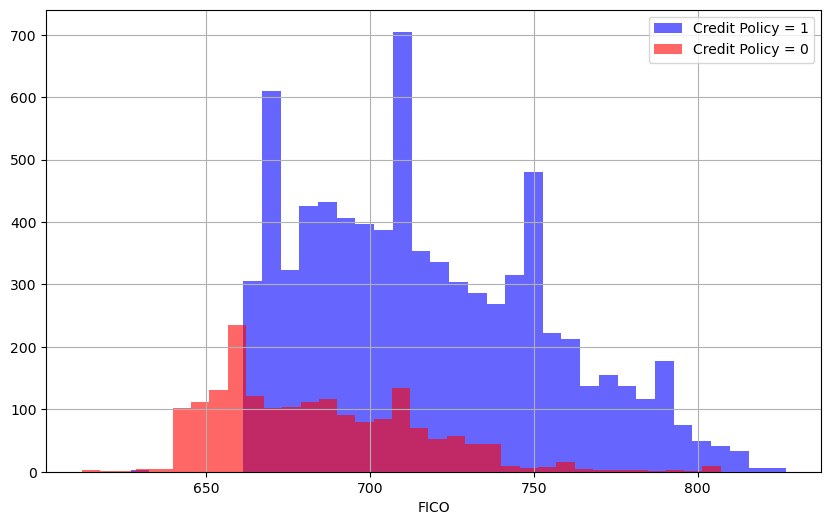

In [34]:
plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(bins=35, color='blue', label='Credit Policy = 1', alpha = 0.6)
loans[loans['credit.policy']==0]['fico'].hist(bins=35, color='red', label='Credit Policy = 0', alpha = 0.6)

plt.legend()
plt.xlabel('FICO')

### Let's create a similar figure, except this time select by the not.fully.paid column

Text(0.5, 0, 'FICO')

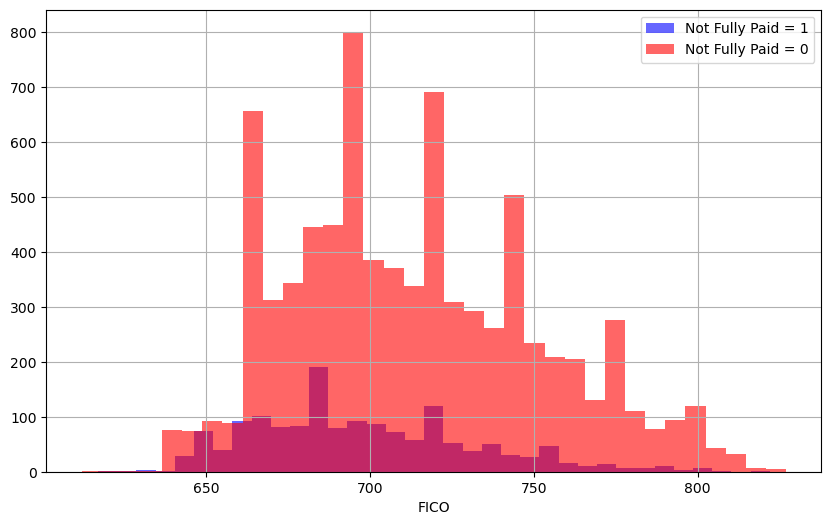

In [37]:
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==1]['fico'].hist(bins=35, color='blue', label='Not Fully Paid = 1', alpha = 0.6)
loans[loans['not.fully.paid']==0]['fico'].hist(bins=35, color='red', label='Not Fully Paid = 0', alpha = 0.6)

plt.legend()
plt.xlabel('FICO')

### Now, let create a countplot using seaborn showing the counts of loans by purpose, with the color hue define by not.fully.paid

<Axes: xlabel='purpose', ylabel='count'>

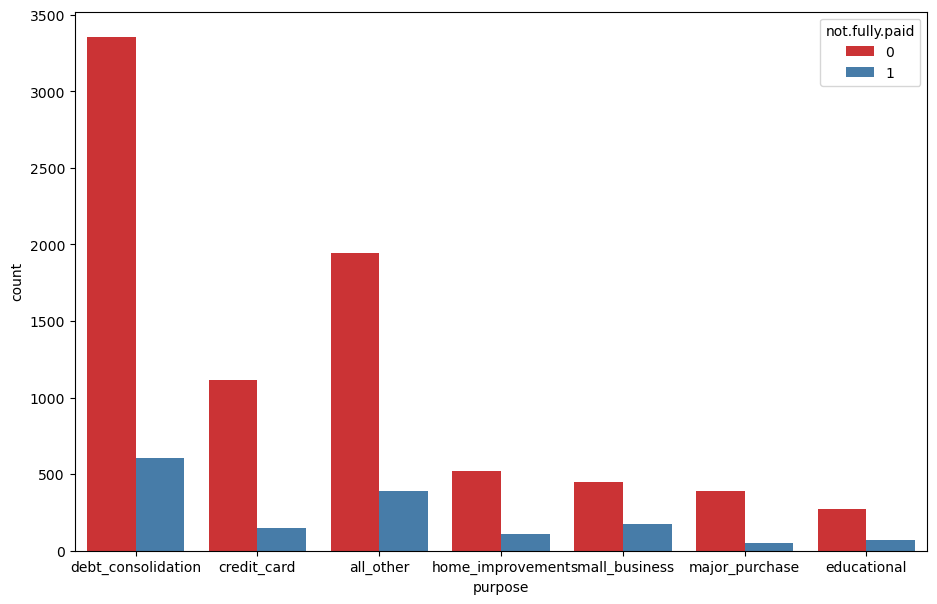

In [40]:
plt.figure(figsize=(11,7))
sns.countplot(x = 'purpose', hue='not.fully.paid', data = loans, palette='Set1')

#### From the plot above, debt_consolidation seems to be the most popular reason for wanting a loan

### Let's see the tren between FICO score and interest rate. We will recreate the following joinplot

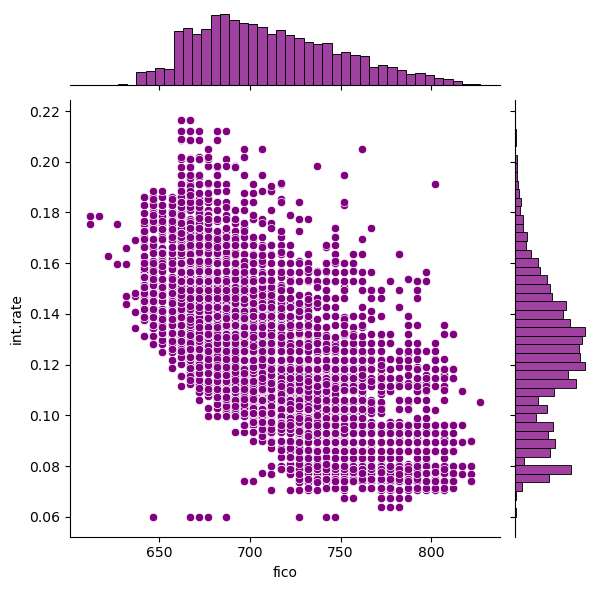

In [56]:
sns.jointplot(x='fico', y='int.rate', data=loans, color='purple')

#### From above, we see that as the FICO score increases, the interest rate you have to pay off that loan tends to decrease

### Let's create the following lmplots to see if the trend differed between not.fully.paid and credit.policy

<Figure size 1100x700 with 0 Axes>

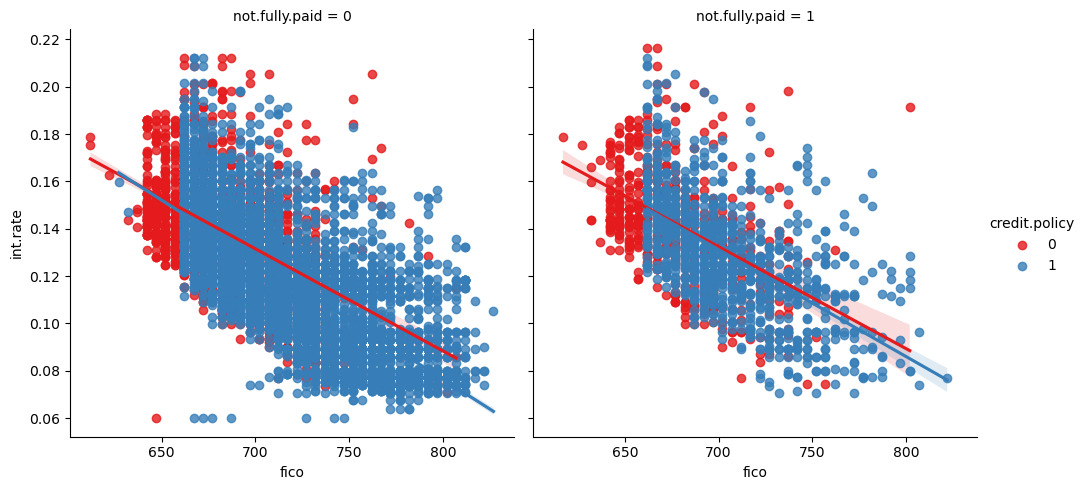

In [66]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate', x='fico', data=loans, hue='credit.policy', col='not.fully.paid', palette='Set1')

# Setting up the data

Let's get ready to set up the data for our Random Fprest Classification Model!

## Categorical Features

From the information of the dataset, notice the 'purpose' column as categorical

That means we need to transform them using dummy variables so sklean will be able to understand them. 

In [85]:
cat_feats = ['purpose']

In [87]:
final_data = pd.get_dummies(loans, columns=cat_feats, drop_first=True).astype(int)

In [97]:
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,False,True,False,False,False,False
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,True,False,False,False,False,False
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,False,True,False,False,False,False
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,False,True,False,False,False,False
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,True,False,False,False,False,False


# Train Test Split

Not its time to spit our data into a training set and a testing set!

In [102]:
from sklearn.model_selection import train_test_split

In [104]:
X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## Training a Decision Tree Model

Let's start by training a single decision tree first!

**Let's create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.**

In [115]:
from sklearn.tree import DecisionTreeClassifier

In [117]:
dtree = DecisionTreeClassifier()

In [130]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Predictions and Evaluation of Decision Tree
**Create predictions from the test set and create a classification report and a confusion matrix.**

predictions = dtree.predict(X_test)

In [135]:
from sklearn.metrics import classification_report, confusion_matrix

In [137]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2431
           1       0.18      0.22      0.20       443

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.75      0.73      0.74      2874



In [139]:
print(confusion_matrix(y_test,predictions))

[[1991  440]
 [ 344   99]]


## Training the Random Forest model

Now its time to train our model!

**Let's create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.**

In [142]:
from sklearn.ensemble import RandomForestClassifier

In [143]:
rfc = RandomForestClassifier(n_estimators=600)

In [146]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

## Predictions and Evaluation

Let's predict off the y_test values and evaluate our model.

** Predict the class of not.fully.paid for the X_test data.**

In [151]:
predictions = rfc.predict(X_test)

### Now let's create a classification report from the results. Do we get anything strange or some sort of warning?

In [154]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.53      0.02      0.04       443

    accuracy                           0.85      2874
   macro avg       0.69      0.51      0.48      2874
weighted avg       0.80      0.85      0.78      2874



### Show the Confusion Matrix for the predictions

In [157]:
print(confusion_matrix(y_test,predictions))

[[2423    8]
 [ 434    9]]


**What performed better the random forest or the decision tree?**

- Depends what metric we are trying to optimize for. 
- Notice the recall for each class for the models.
- Neither did very well, more feature engineering is needed.